<a href="https://colab.research.google.com/github/sleiph/exploracao-de-dados/blob/main/precos_BOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preço das ações BOVESPA - yahoo finance

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## lendo os dados do yahoo
from pandas_datareader import data as web

## entrada de dados

In [7]:
# nome do fundo estudado.SA : nome a ser exibido no dataFrame
fundos = {
    'XPCI11.SA': 'XP Credito Imobiliario', 'XPLG11.SA': 'XP LOG', 'XPML11.SA': 'XP MALLS',
    'GRLV11.SA': 'CSHG GR Louveira (HF)', 'HGRU11.SA': 'CSHG Renda Urbana',
    'VILG11.SA': 'Vinci Logistica', 'VINO11.SA': 'Vinci Offices',
    'HCTR11.SA': 'Hectare Ce',
    'KNIP11.SA': 'Kinea Renda Imobiliária'
}

# data pro começo dos dados mm/dd/yyyy
data_inicio = '01/06/2007'

# método de ajuste
ajuste = 'Adj Close'

## populando o dataFrame

In [9]:
# https://medium.com/geleia/an%C3%A1lise-de-a%C3%A7%C3%B5es-com-python-7f6624939fb
df = pd.DataFrame()

## adicionando o índice bovespa
df['IBovespa'] = web.get_data_yahoo('^BVSP', data_inicio)[ajuste]
df['IBovespa'] = df['IBovespa']/1000

for k, v in fundos.items():
  try:
    df[v] = web.get_data_yahoo(k, data_inicio)[ajuste]
  except:
    print("erro no fundo {}".format(v))

## Adicionando as datas como colunas
df.reset_index(inplace = True)
df.rename(columns ={'Date':'Data'},inplace = True)

In [10]:
# primeiros 5 dias dos dados
df.head()

,Data,IBovespa,XP Credito Imobiliario,XP LOG,XP MALLS,CSHG GR Louveira (HF),CSHG Renda Urbana,Vinci Logistica,Vinci Offices,Hectare Ce,Kinea Renda Imobiliária
0,2007-01-08,42.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-01-09,42.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-01-10,42.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-01-11,42.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-01-12,43.095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# últimos 5 dias dos dados
df[len(df.index)-5:].head(5)

,Data,IBovespa,XP Credito Imobiliario,XP LOG,XP MALLS,CSHG GR Louveira (HF),CSHG Renda Urbana,Vinci Logistica,Vinci Offices,Hectare Ce,Kinea Renda Imobiliária
3500,2021-03-15,114.851,94.709999,115.000000,105.019997,145.5,124.580002,118.980003,60.799999,146.380005,115.750000
3501,2021-03-16,114.019,95.349998,113.599998,104.500000,145.5,123.300003,119.199997,60.820000,146.990005,114.000000
3502,2021-03-17,116.549,95.500000,113.500000,104.250000,145.5,124.000000,119.000000,60.439999,145.500000,114.400002
3503,2021-03-18,114.835,95.500000,112.900002,103.900002,145.5,122.760002,118.279999,60.200001,144.910004,113.779999
3504,2021-03-19,116.222,95.320000,113.040001,104.180000,145.5,123.849998,118.000000,60.779999,145.500000,114.139999


## Gráficos

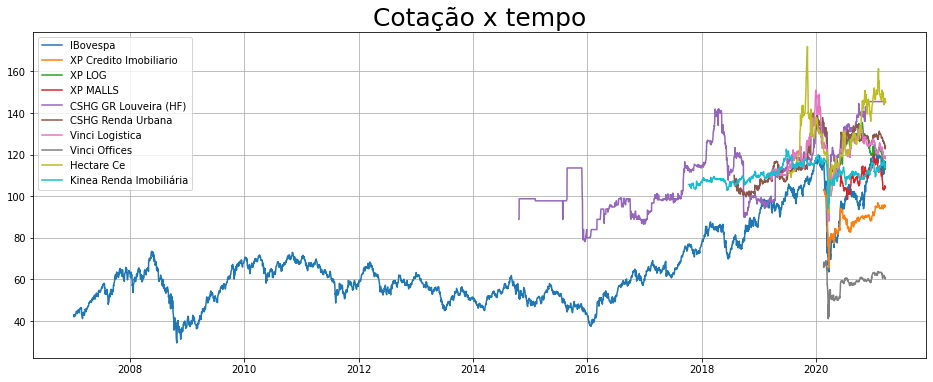

In [12]:
# Cotação x tempo - FIIs
tickers = list(df.drop(['Data'], axis = 1).columns)
plt.figure(figsize=(16,6))

for i in tickers:
  plt.plot(df['Data'], df[i])
plt.legend(tickers)
plt.grid()
plt.title("Cotação x tempo", fontsize = 25)
plt.show()

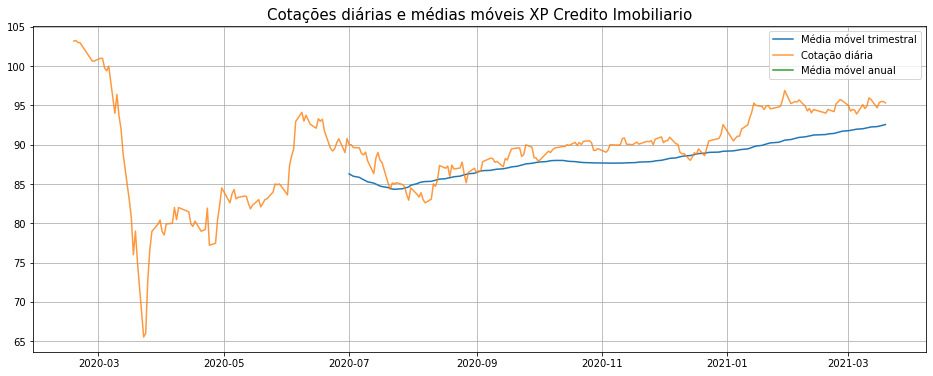

In [13]:
# médias móveis trimestrais e anuais da XP Credito Imobiliario
plt.figure(figsize=(16,6))
plt.plot(df['Data'], df['XP Credito Imobiliario'].rolling(window = 90).mean())
plt.plot(df['Data'], df['XP Credito Imobiliario'], alpha = 0.8)
plt.plot(df['Data'], df['XP Credito Imobiliario'].rolling(window = 365).mean())
plt.grid()
plt.title('Cotações diárias e médias móveis XP Credito Imobiliario', fontsize = 15)
plt.legend(['Média móvel trimestral','Cotação diária','Média móvel anual'])
plt.show()

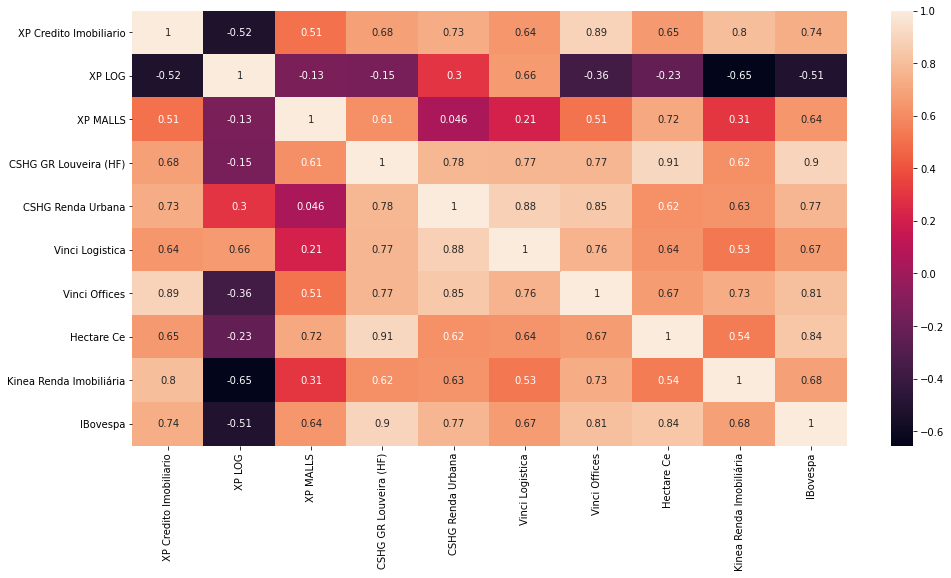

In [ ]:
# heatmap das fiis
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# retorno diário dos fundos
retornos = pd.DataFrame()
for i in tickers:
  retornos[i] = df[i].pct_change()
retornos['Data'] = df['Data']
retornos.describe()

,XP Credito Imobiliario,XP LOG,XP MALLS,CSHG GR Louveira (HF),CSHG Renda Urbana,Vinci Logistica,Vinci Offices,Hectare Ce,Kinea Renda Imobiliária,IBovespa
count,257.000000,186.000000,186.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,-0.000168,0.000021,-0.000040,0.000548,-0.000134,0.000024,-0.000045,0.000769,0.000039,0.000335
std,0.017637,0.010731,0.009906,0.018365,0.017444,0.020783,0.024347,0.016227,0.011093,0.028366
min,-0.126400,-0.042148,-0.027374,-0.145299,-0.164369,-0.179035,-0.166667,-0.105601,-0.092314,-0.147797
25%,-0.005215,-0.004318,-0.006384,-0.001742,-0.003925,-0.004481,-0.004653,-0.004646,-0.003796,-0.011774
50%,0.000774,0.000351,-0.000388,0.000000,0.000000,0.000245,0.000000,0.001389,0.000604,0.000854
75%,0.006036,0.003890,0.005662,0.003114,0.004764,0.005505,0.005736,0.008062,0.004496,0.013725
max,0.101515,0.049838,0.027256,0.110988,0.069257,0.131868,0.169306,0.077609,0.042021,0.139082


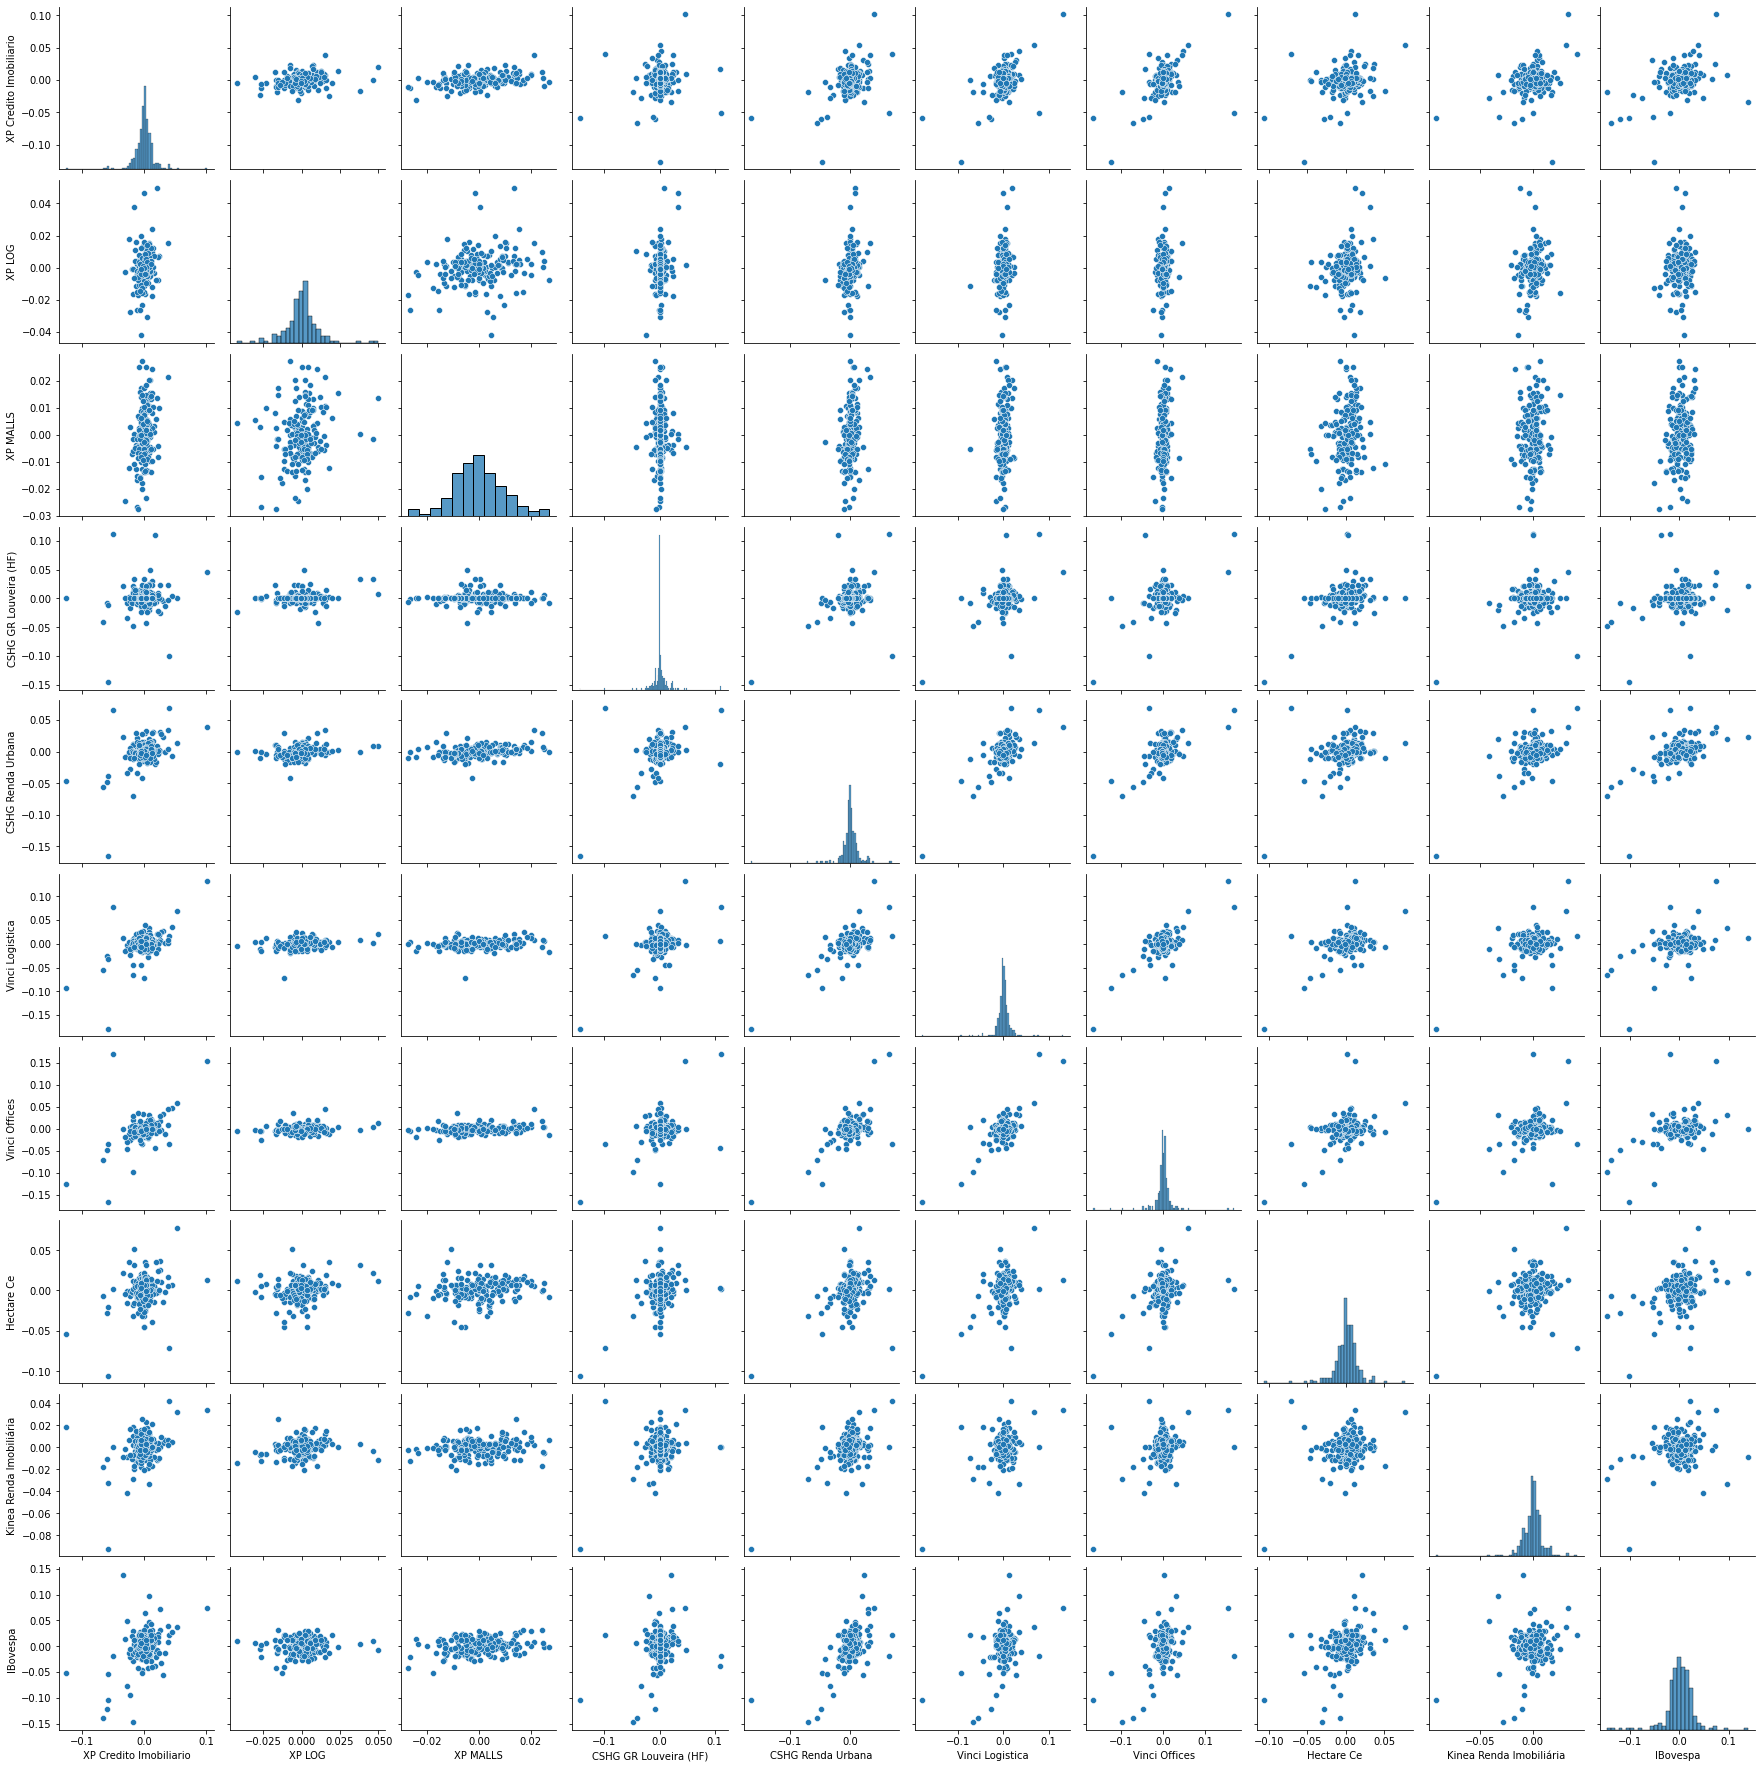

In [ ]:
# pairplot, sei lá pra que serve isso
sns.pairplot(retornos)
plt.show()

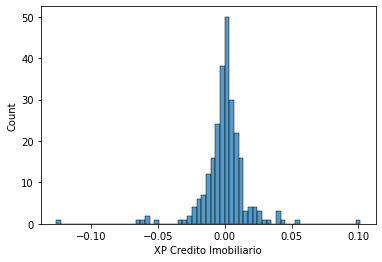

In [ ]:
# histplot da XP Credito Imobiliario
sns.histplot(retornos['XP Credito Imobiliario'].dropna())

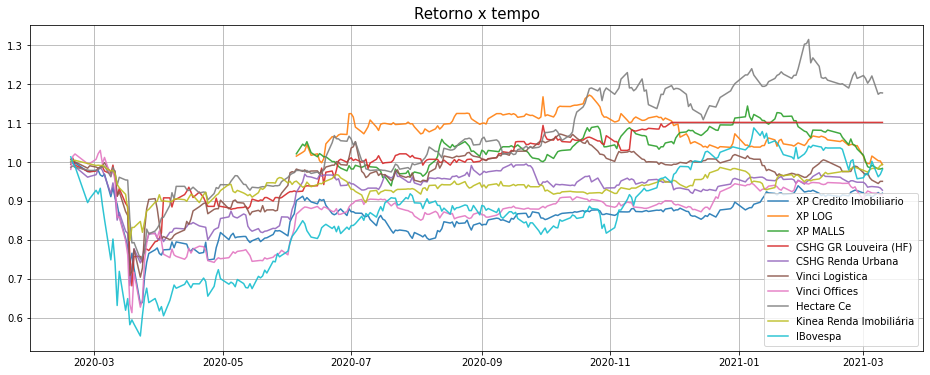

In [ ]:
# retorno acumulado dos fundos
retornos_soma = pd.DataFrame()

for ticker in tickers:
    retornos_soma[ticker] = (retornos[ticker]+1).cumprod()
retornos_soma['Data'] = retornos['Data']

plt.figure(figsize=(16,6))
plt.plot(retornos_soma['Data'], retornos_soma.drop(['Data'], axis = 1), alpha = 0.9)
plt.legend(tickers)
plt.title("Retorno x tempo", fontsize = 15)
plt.grid()
plt.show()